In [27]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Loading from URL to Pandas Dataframe.

# dataset URL
URL = 'https://raw.githubusercontent.com/labdhigandhi/FlightDelays/main/transfusion.data'

# Read dataset to pandas dataframe.
dataset = pd.read_csv(URL)
dataset.head()

#split dataset in features and target variable
feature_cols = ['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)']
X = dataset[feature_cols] # Features
dataset = dataset.rename(columns = {"whether he/she donated blood in March 2007":"label"}) 
y = dataset.label # Target variable
print(dataset.head())

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

   Recency (months)  Frequency (times)  ...  Time (months)  label
0                 2                 50  ...             98      1
1                 0                 13  ...             28      1
2                 1                 16  ...             35      1
3                 2                 20  ...             45      1
4                 1                 24  ...             77      0

[5 rows x 5 columns]
Accuracy: 0.72


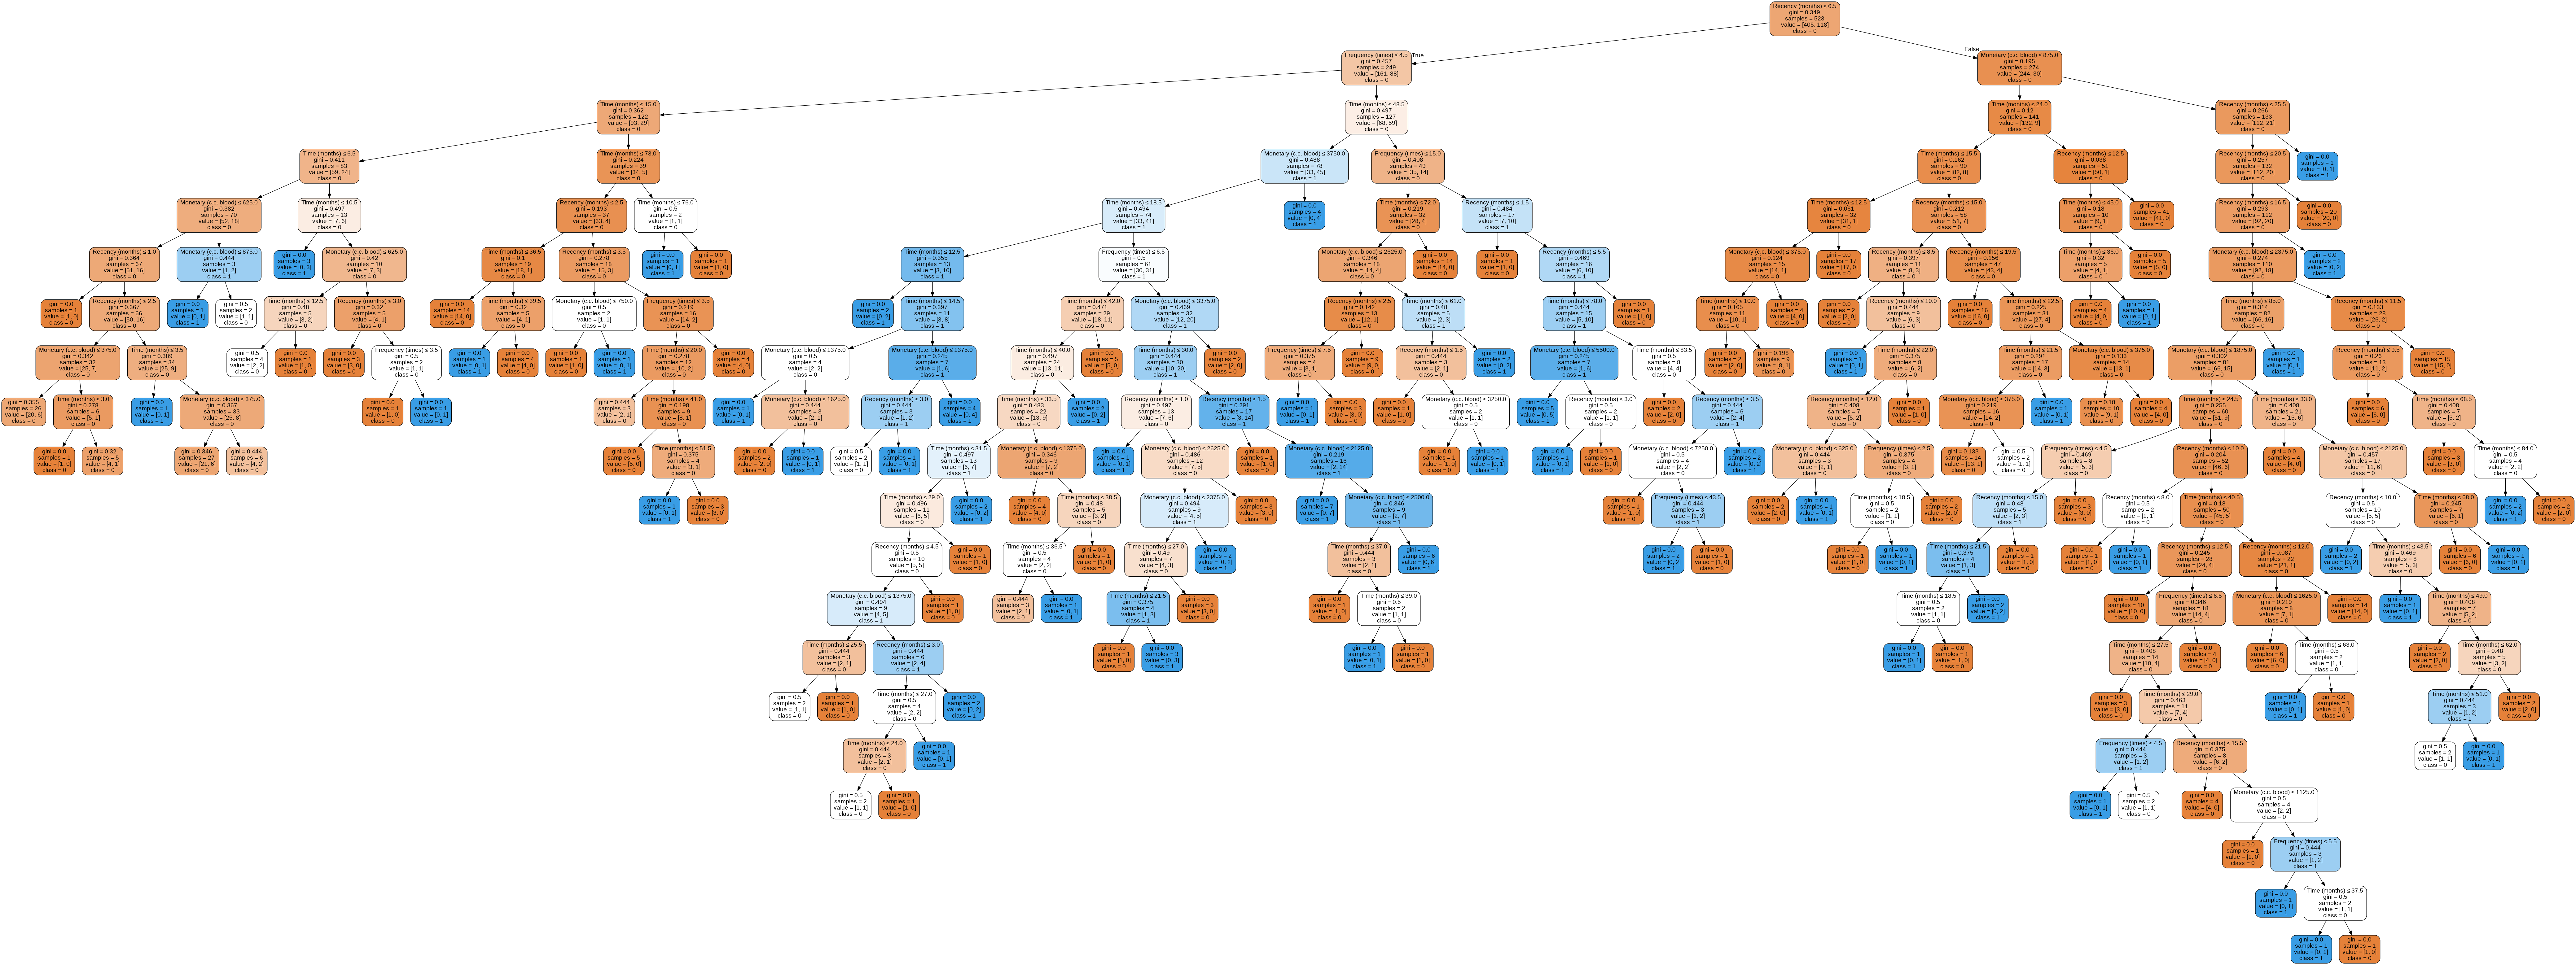

In [28]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('transfusion.png')
Image(graph.create_png())

In [29]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7911111111111111


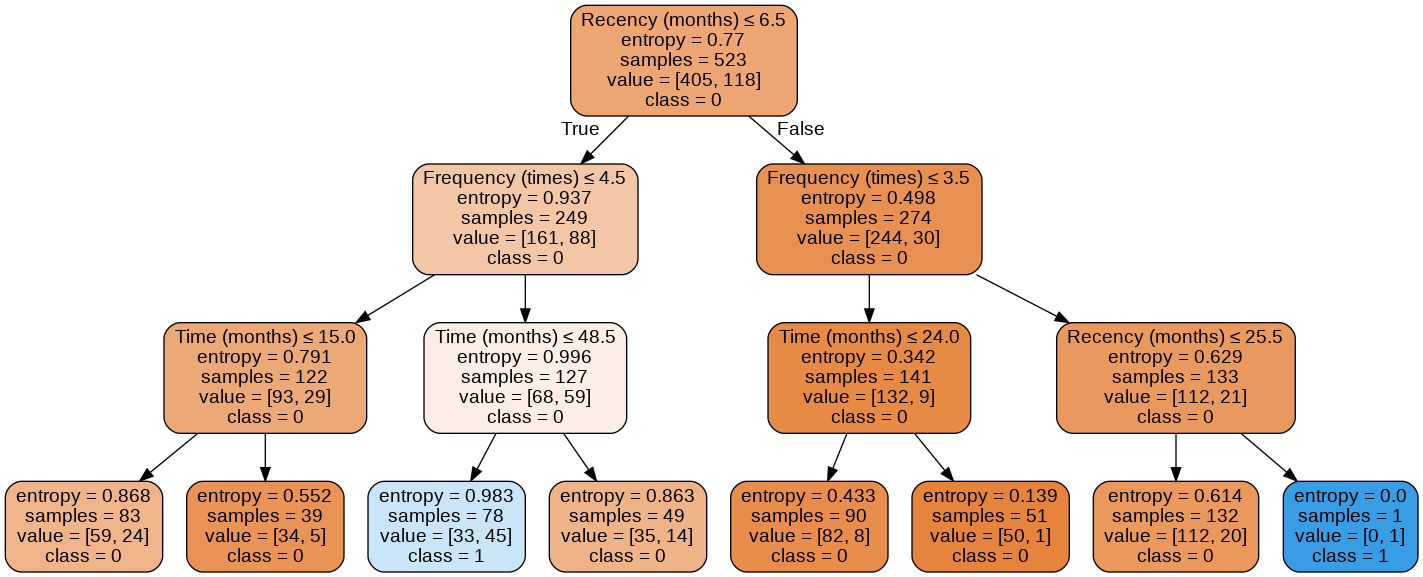

In [30]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('transfusion1.png')
Image(graph.create_png())